3    12.651317
1    11.102177
5     9.271555
6     8.952673
7     8.450665
0     9.759453
2     9.249578
4     8.522291
8     7.456206
Name: Sharpness post-cal, dtype: float64
3    10.785447
1    10.560203
5    10.551337
6    10.092305
7     9.657118
0     9.319418
2     8.444339
4     8.178902
8     7.826846
Name: Test R^2, dtype: float64


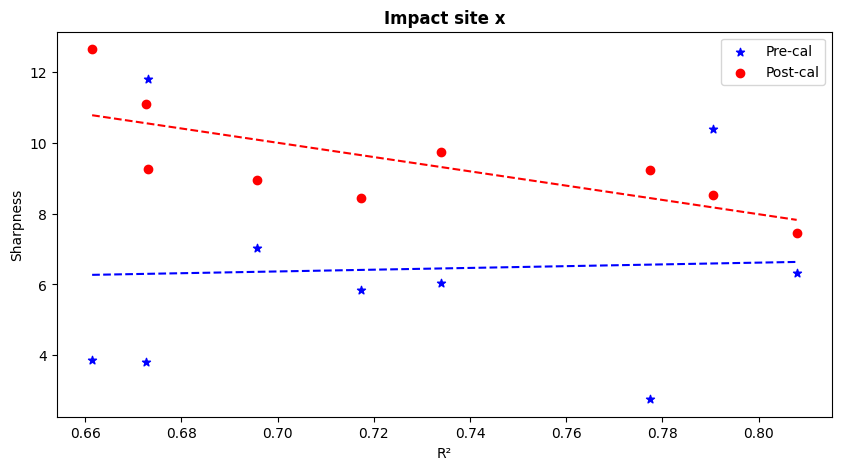

3    13.694075
5    11.957334
1    12.385663
6    10.550391
0    10.352727
7     9.024453
2     9.971429
8     8.350049
4     9.123869
Name: Sharpness post-cal, dtype: float64
3    13.341883
5    12.377945
1    11.933322
6    11.170931
0     9.943626
7     9.775956
2     9.218659
8     8.914149
4     8.733519
Name: Test R^2, dtype: float64


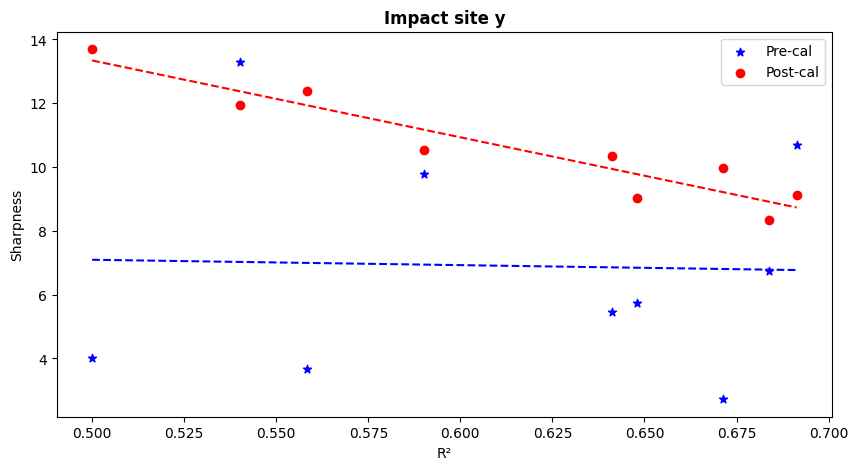

3    1.194192
6    1.002556
1    1.170894
0    1.150642
7    1.059090
5    1.060834
8    1.000592
4    1.036180
2    1.155630
Name: Sharpness post-cal, dtype: float64
3    1.115284
6    1.110594
1    1.103286
0    1.101847
7    1.097994
5    1.094631
8    1.077873
4    1.065541
2    1.063561
Name: Test R^2, dtype: float64


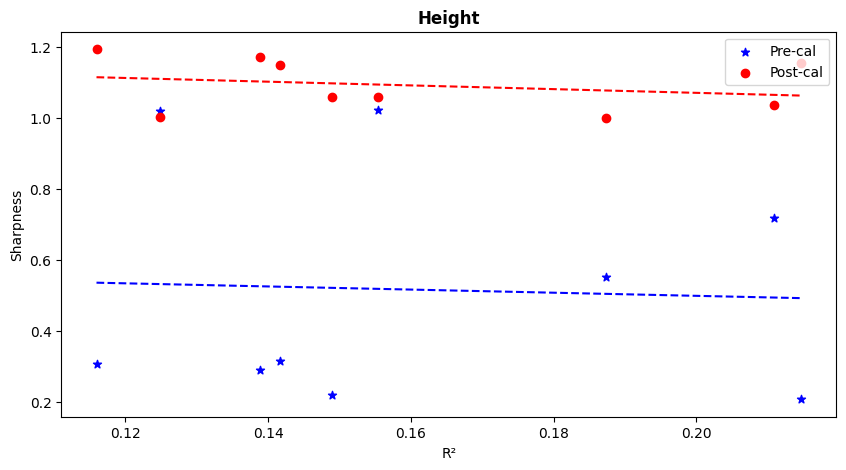

In [1]:
'''plot sharpness vs R2 before and after recalibration'''
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
'''hi'''

# Load the Excel sheet
file_path = '/Users/jakehirst/Desktop/sfx/Presentations_and_Papers/Paper 2/results table.xlsx'
df_impact_site_x = pd.read_excel(file_path, sheet_name='impact site x')
df_impact_site_y = pd.read_excel(file_path, sheet_name='impact site y')
df_height = pd.read_excel(file_path, sheet_name='height')

'''
plots the sharpness vs R2 before and after recalibration
'''
def plot_sharpness_vs_R2(df, label_to_predict):
    # Extracting data
    sharpness_precal = df['Sharpness']
    sharpness_postcal = df['Sharpness post-cal']
    r2 = df['Test R^2']

    # Sorting the r2 and sharpness values according to r2
    idx = np.argsort(r2)
    r2_sorted = r2[idx]
    sharpness_precal_sorted = sharpness_precal[idx]
    sharpness_postcal_sorted = sharpness_postcal[idx]
    
    # Fit lines to sorted data
    slope_precal, intercept_precal = np.polyfit(r2_sorted, sharpness_precal_sorted, 1)
    slope_postcal, intercept_postcal = np.polyfit(r2_sorted, sharpness_postcal_sorted, 1)

    # Generate values for the linear fit lines
    fit_line_precal = slope_precal * r2_sorted + intercept_precal
    fit_line_postcal = slope_postcal * r2_sorted + intercept_postcal

    # Calculate R^2 values using r2_score
    precal_r2_score = r2_score(sharpness_precal_sorted, fit_line_precal)
    postcal_r2_score = r2_score(sharpness_postcal_sorted, fit_line_postcal)
    print(sharpness_postcal_sorted)
    print(fit_line_postcal)
    
    plt.figure(figsize=(10,5))
    plt.scatter(r2_sorted, sharpness_precal_sorted, marker='*', c='blue', label='Pre-cal')
    plt.scatter(r2_sorted, sharpness_postcal_sorted, c='red', label='Post-cal')
    
    #Plot linear fit lines with R^2 in the label
    plt.plot(r2_sorted, fit_line_precal, 'b--')  # Blue dashed line with R^2
    plt.plot(r2_sorted, fit_line_postcal, 'r--')  # Red dashed line with R^2
    
    if(label_to_predict == 'height'):
        plt.xlim((0.0,0.3))
    elif(label_to_predict == 'impact site x'):
        plt.xlim((0.6, 0.9))
    elif(label_to_predict == 'impact site y'):
        plt.xlim((0.5, 0.8))
    plt.title(label_to_predict, fontweight="bold")
    plt.legend(loc='upper right')
    plt.xlabel('R\u00B2')
    plt.ylabel('Sharpness')
    plt.show()
    
    # plt.savefig(f'/Users/jakehirst/Desktop/sfx/Presentations_and_Papers/Paper 2/Figures/sharpness_before_after_recal_{label_to_predict}.pdf', format='pdf', dpi=300)

    plt.close()

    
    return

plot_sharpness_vs_R2(df_impact_site_x, 'Impact site x')
plot_sharpness_vs_R2(df_impact_site_y, 'Impact site y')
plot_sharpness_vs_R2(df_height, 'Height')



/var/folders/hv/9s5v4g912kj9f99h_tfcyg7c0000gn/T/ipykernel_56494/2861198082.py:31: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead.
  index = pd.np.linspace(0, total_width - group_width - space_width, num_models)


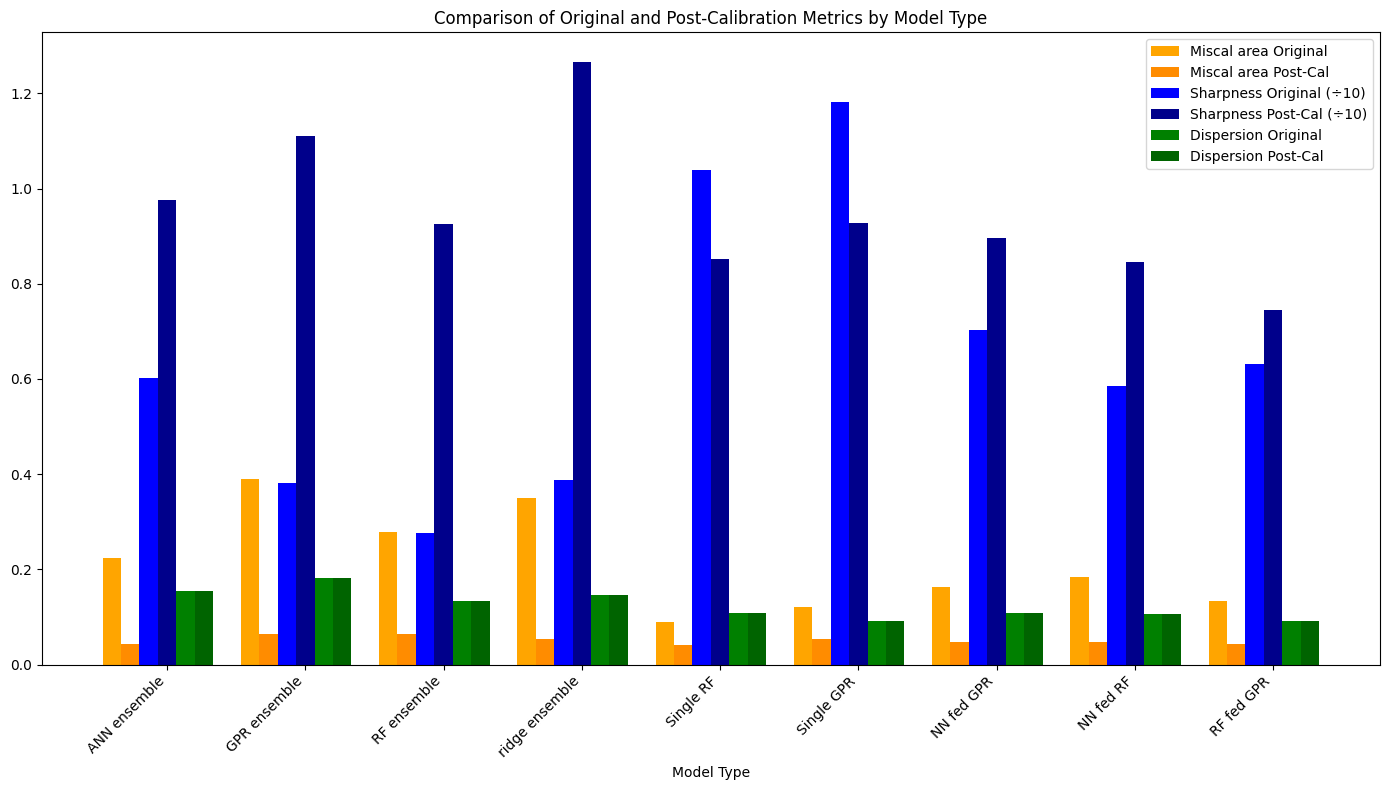

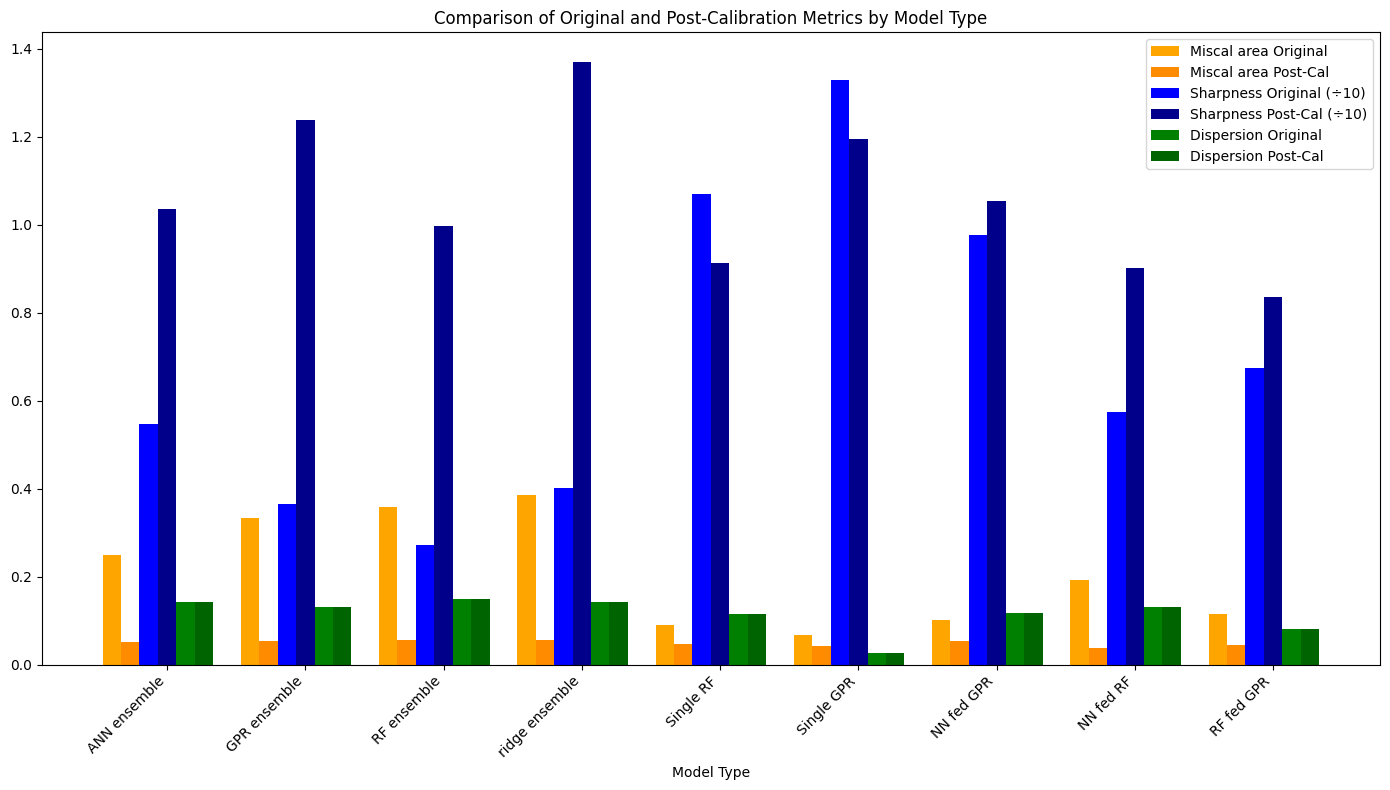

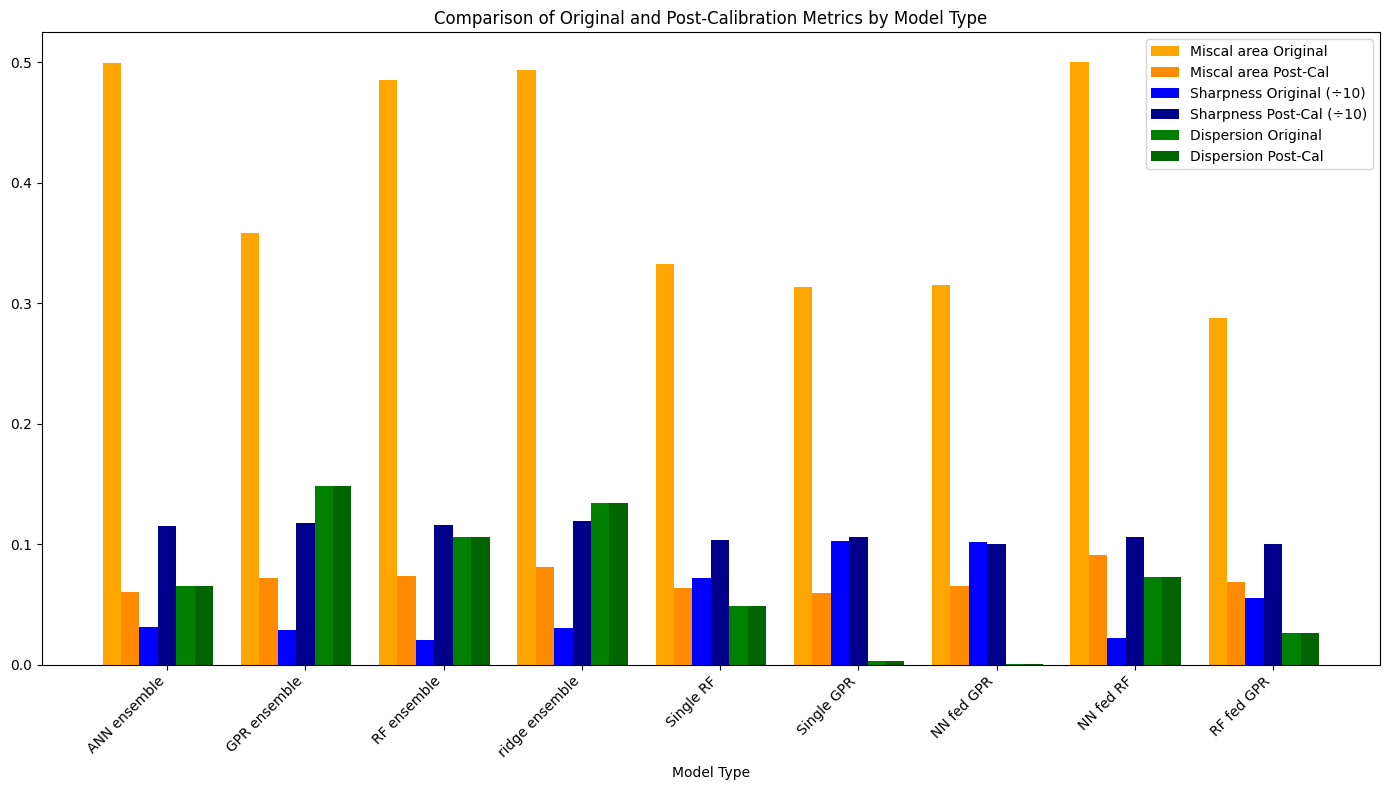

In [2]:
'''making figures from the results table'''

import matplotlib.pyplot as plt
import pandas as pd

# Load the Excel sheet
file_path = '/Users/jakehirst/Desktop/sfx/Presentations_and_Papers/Paper 2/results table.xlsx'
df_impact_site_x = pd.read_excel(file_path, sheet_name='impact site x')
df_impact_site_y = pd.read_excel(file_path, sheet_name='impact site y')
df_height = pd.read_excel(file_path, sheet_name='height')

def plot_metrics(label, df):
    # Colors for the original and post-cal metrics
    colors = {
        'Miscal area': 'lightorange',
        'Miscal area post-cal': 'darkorange',
        'Sharpness': 'lightblue',
        'Sharpness post-cal': 'darkblue',
        'Dispersion': 'lightgreen',
        'Dispersion post-cal': 'darkgreen'
    }

    # Spacing between each model type
    group_width = 0.8  # the total width of the group of bars for each model type
    bar_width = group_width / len(colors)  # the width of each individual bar within the group
    space_width = 0.2  # the width of the space between groups

    # Calculate the positions of the groups and the bars within each group
    num_models = len(df)
    total_width = (group_width + space_width) * num_models
    index = pd.np.linspace(0, total_width - group_width - space_width, num_models)

    # Set up the figure and axes
    fig, ax = plt.subplots(figsize=(14, 8))

    # Function to plot bars for a metric
    def plot_bars(metric, color, offset):
        if(metric == 'Sharpness'):
            original = df[metric] /10
            post_cal = df[f'{metric} post-cal'] /10
            ax.bar(index + offset, original, bar_width, label=f'{metric} Original (\u00f710)', color=color)
            ax.bar(index + offset + bar_width, post_cal, bar_width, label=f'{metric} Post-Cal (\u00f710)', color=f'dark{color}')

        else:
            original = df[metric]
            post_cal = df[f'{metric} post-cal']
            ax.bar(index + offset, original, bar_width, label=f'{metric} Original', color=color)
            ax.bar(index + offset + bar_width, post_cal, bar_width, label=f'{metric} Post-Cal', color=f'dark{color}')

    # Plot bars for each metric with its respective color
    plot_bars('Miscal area', 'orange', 0)
    plot_bars('Sharpness', 'blue', bar_width * 2)
    plot_bars('Dispersion', 'green', bar_width * 4)

    # Set the x-axis labels, title, and x-axis ticks
    ax.set_xlabel('Model Type')
    ax.set_title('Comparison of Original and Post-Calibration Metrics by Model Type')
    ax.set_xticks(index + group_width / 2)
    ax.set_xticklabels(df['Model type'], rotation=45, ha="right")

    # Adding the legend
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


plot_metrics('impact site x', df_impact_site_x)
plot_metrics('impact site y', df_impact_site_y)
plot_metrics('height', df_height)

forestci is an optional dependency. To install latest forestci compatabilty with scikit-learn>=0.24, run pip install git+git://github.com/scikit-learn-contrib/forest-confidence-interval.git
XGBoost is an optional dependency. If you want to use XGBoost models, please manually install xgboost package with pip install xgboost. If have error with finding libxgboost.dylib library, dobrew install libomp. If do not have brew on your system, first do ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)" from the Terminal
scikit-lego is an optional dependency, enabling use of the LowessRegression model. If you want to use this model, do "pip install scikit-lego"
not saving parody plot
not saving parody plot


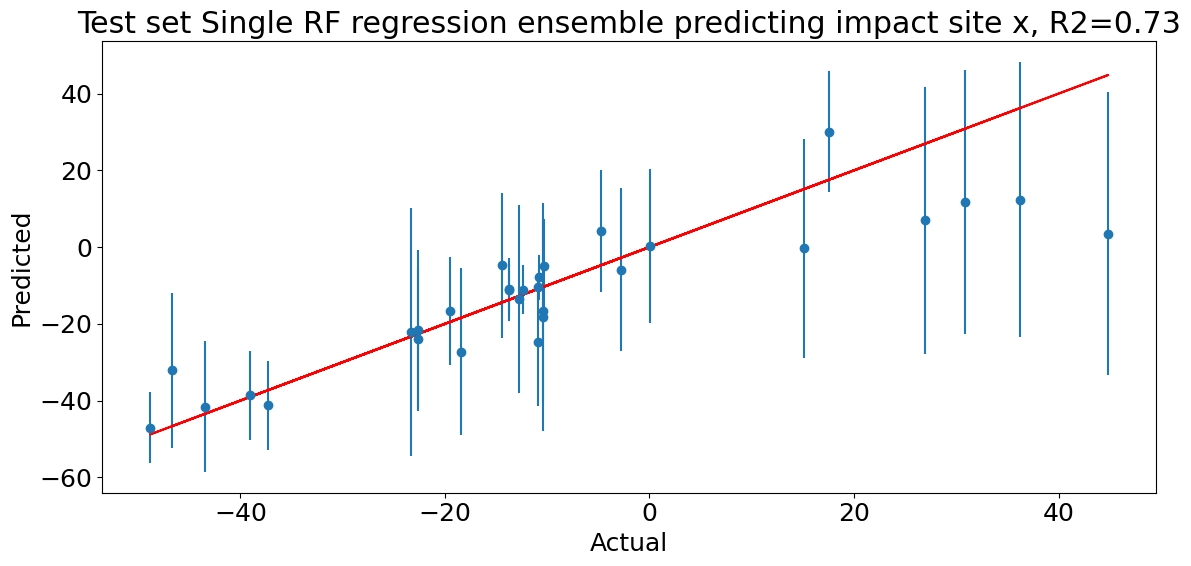

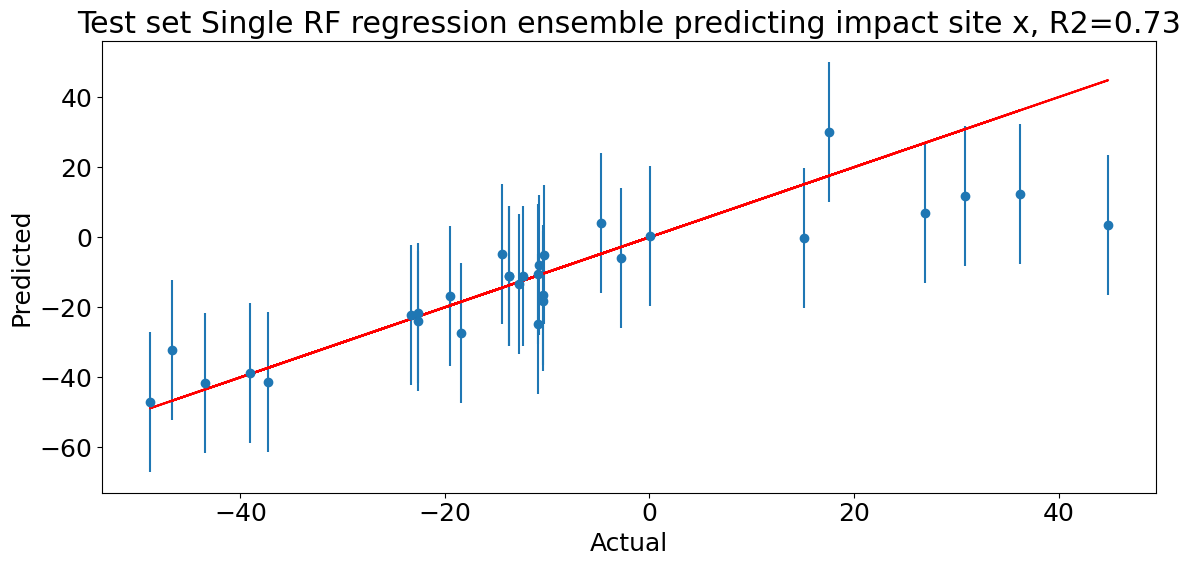

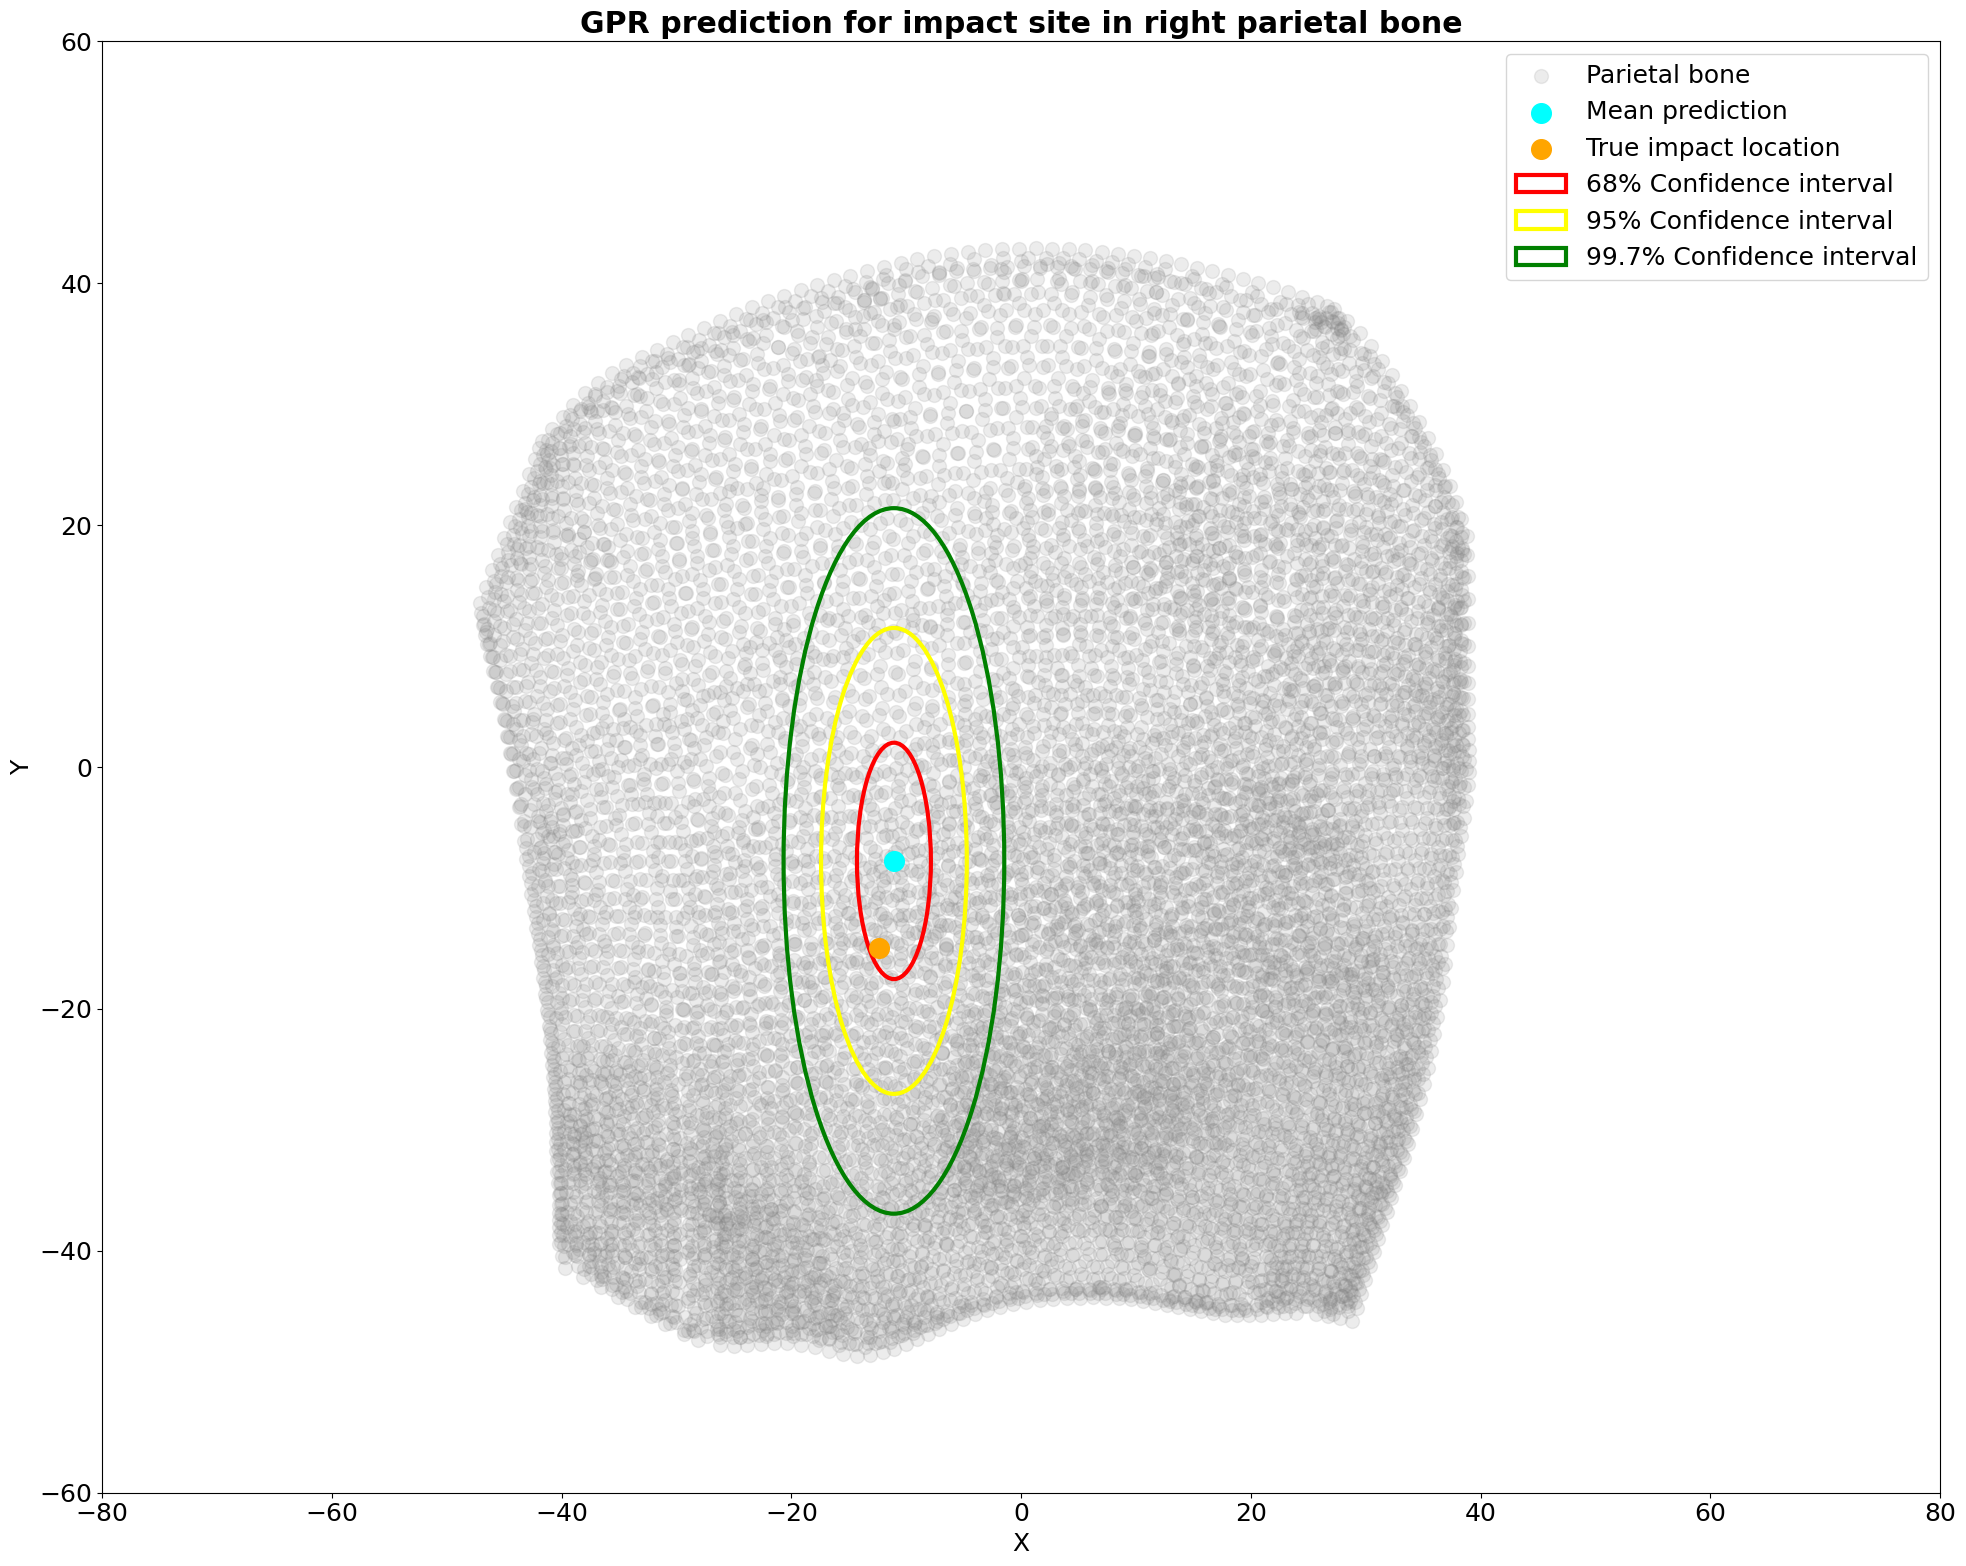

In [3]:
from Figures import *
from ReCalibration import *

all_labels = ['height', 'phi', 'theta', 
                            'impact site x', 'impact site y', 'impact site z', 
                            'impact site r', 'impact site phi', 'impact site theta']

model_types = ['Single RF']
model_types = ['RF_fed_GPR']
model_types = ['ANN', 'GPR', 'RF', 'ridge', 'Single RF', 'Single GPR', 'NN_fed_GPR', 'NN_fed_RF', 'RF_fed_GPR']
model_types = ['Single RF']

for fold_no in range(1,2):
    for model_type in model_types:
        x_model_folder = f'/Volumes/Jake_ssd/Paper 2/without_transformations/UQ_bagging_models_without_transformations/impact site x/{model_type}'
        y_model_folder = f'/Volumes/Jake_ssd/Paper 2/without_transformations/UQ_bagging_models_without_transformations/impact site y/{model_type}'

        #defining folders to get the models and to store the results
        # model_saving_folder = f'{model_folder}/{label_to_predict}/{model_type}/{num_models}_models/fold_{fold_no}'
        results_saving_folder = None
        
        Paper2_path = f'/Volumes/Jake_ssd/Paper 2/without_transformations'
        #defining folders where the datasets are coming from (5-fold cv)
        x_test_features_path = Paper2_path + f'/5fold_datasets/impact site x/fold{fold_no}/test_features.csv'
        x_test_labels_path = Paper2_path + f'/5fold_datasets/impact site x/fold{fold_no}/test_labels.csv'
        y_test_features_path = Paper2_path + f'/5fold_datasets/impact site y/fold{fold_no}/test_features.csv'
        y_test_labels_path = Paper2_path + f'/5fold_datasets/impact site y/fold{fold_no}/test_labels.csv'


        #defining the features that each model used (since they vary with each model)
        # features_to_keep = ????
        df = pd.read_csv(x_test_features_path, index_col=0)
        all_features = df.columns
        # all_features = all_features.drop(all_labels)
        features_to_keep = str(all_features.drop('timestep_init').to_list())
        
        if(model_type in ['ANN', 'RF', 'GPR','ridge']):
            #predicting the test and train sets with the bagging models
            test_r2_X, test_ensemble_predictions_X, test_uncertanties_X, test_labels_X = Get_predictions_and_uncertainty_with_bagging(x_test_features_path, x_test_labels_path, x_model_folder + f'/20_models/fold_{fold_no}', results_saving_folder, ast.literal_eval(features_to_keep), 'impact site x', model_type)
            test_r2_Y, test_ensemble_predictions_Y, test_uncertanties_Y, test_labels_Y = Get_predictions_and_uncertainty_with_bagging(y_test_features_path, y_test_labels_path, y_model_folder + f'/20_models/fold_{fold_no}', results_saving_folder, ast.literal_eval(features_to_keep), 'impact site y', model_type)
            
        else:
            #predicting the test and train sets with the NON bagging models
            test_r2_X, test_ensemble_predictions_X, test_uncertanties_X, test_labels_X = Get_predictions_and_uncertainty_single_model(x_test_features_path, x_test_labels_path, x_model_folder + f'/1_models/fold_{fold_no}', results_saving_folder, ast.literal_eval(features_to_keep), 'impact site x', model_type)
            test_r2_Y, test_ensemble_predictions_Y, test_uncertanties_Y, test_labels_Y = Get_predictions_and_uncertainty_single_model(y_test_features_path, y_test_labels_path, y_model_folder + f'/1_models/fold_{fold_no}', results_saving_folder, ast.literal_eval(features_to_keep), 'impact site y', model_type)

        random_examples = random.sample(range(51), 30)
        r2 = parody_plot_with_std(test_labels_X[random_examples], test_ensemble_predictions_X[random_examples], test_uncertanties_X[random_examples], None, 'impact site x', model_type, testtrain='Test', show=True)
        r2 = parody_plot_with_std(test_labels_X[random_examples], test_ensemble_predictions_X[random_examples], np.ones(test_uncertanties_X[random_examples].shape) * np.mean(test_uncertanties_X), None, 'impact site x', model_type, testtrain='Test', show=True)
        
        # for test_example_no in range(len(test_ensemble_predictions_X)): #COMMENT goes through all test examples... if you want a specific one, specify the test_example_no
        test_example_no = 1
        plot_impact_site_with_uncertainty_2D_with_ellipse_before_recalibration([68, 95, 99.7], test_ensemble_predictions_X[test_example_no], test_uncertanties_X[test_example_no]/2, test_ensemble_predictions_Y[test_example_no], test_uncertanties_Y[test_example_no]/2, test_labels_X[test_example_no], test_labels_Y[test_example_no], saving_path=None)
        # plot_impact_site_with_uncertainty_2D_with_ellipse_after_recalibration([68, 95, 99.7], test_ensemble_predictions_X[test_example_no], test_uncertanties_X[test_example_no]/2, test_ensemble_predictions_Y[test_example_no], test_uncertanties_Y[test_example_no]/2, test_labels_X[test_example_no], test_labels_Y[test_example_no], saving_path=None)
        # plot_impact_site_with_uncertainty_2D_with_ellipse_using_distribution([68, 95, 99.7], test_ensemble_predictions_X[test_example_no], 0, test_ensemble_predictions_Y[test_example_no], 0, test_labels_X[test_example_no], test_labels_Y[test_example_no], saving_path=None) #COMMENT just plotting the point estimate
        
        '''recalibrating...'''


